<a href="https://colab.research.google.com/github/juliocnsouzadev/deep-learning/blob/medical-coast-personal/Medical_Cost_Personal_Tensorflow_Model_with_OneHot_encoding_using_pd_get_dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Dataset ⚕ 💰
https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

### Reading Data 👓

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### One hot Encoding 🔥

In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Creating Features and Labels 🏷

In [5]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Creating training and test sets 🧪

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

### Creating a Tensorflow Model ⭐

In [9]:
tf.random.set_seed(42)

deep_learning_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="input_layer-01-100"),
    tf.keras.layers.Dense(10, name="input_layer02-10"),
    tf.keras.layers.Dense(1, name="output_layer")
], 
name = "insurance-model-deep-learning-01")

deep_learning_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = deep_learning_model.fit(X_train, y_train, epochs= 350, verbose= 0)

### Evaluating the Model 📐

In [10]:
deep_learning_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.0081 - mae: 3168.0081


[3168.008056640625, 3168.008056640625]

Text(0.5, 0, 'epochs')

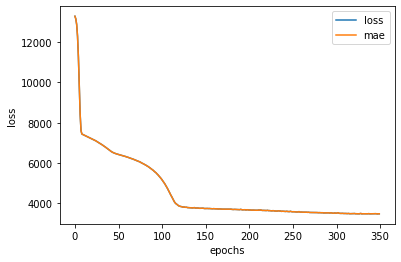

In [11]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Making Predictions 🌐

In [17]:
y_pred = deep_learning_model.predict(X_test)
y_pred[0:5]


9/9 [==============================] - 0s 5ms/step


array([[ 9367.172 ],
       [ 6071.8867],
       [44493.902 ],
       [ 9252.729 ],
       [32339.152 ]], dtype=float32)

### Visualising Predictions 👀

In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Testing Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

In [14]:
(X_train.to_numpy()[:,0].shape, y_train.to_numpy().shape)

((1070,), (1070,))

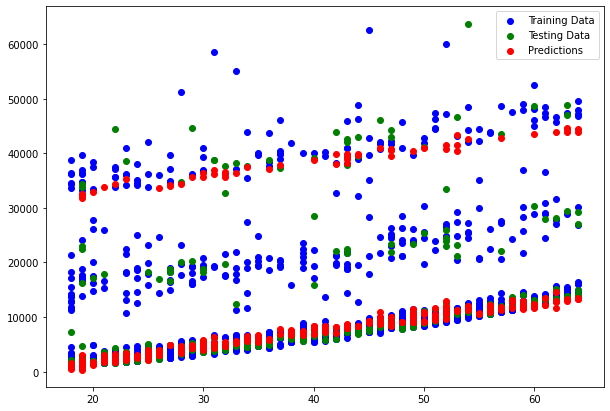

In [15]:
plot_predictions(
   X_train.to_numpy()[:,0],
   y_train.to_numpy(),
   X_test.to_numpy()[:,0],
   y_test.to_numpy(),
   y_pred
)